In [65]:
import pandas as pd

In [66]:
# Load the dataset from the provided Excel file
file_path = '/content/DATASET_CYBERBULLYING_TWITTER.xlsx'
dataset = pd.read_excel(file_path)

In [67]:
# Display the first few rows of the dataset to understand its structure
dataset.head()

,No.,Nama Pelaku,Komentar,Kategori,Tanggal Posting,Nama Korban,Unnamed: 6,Unnamed: 7
0,1,@khanayarudinita,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",Bullying,22 Juni 2019,@tasyakamila,NaN,NaN
1,2,@frdtias_,"""Jijik astagah sok bat cakep njs""",Bullying,28 Maret 2020,@eeericko,NaN,NaN
2,3,@belumadajudullagi,"""Kaya tulus ya mukanya klo diliat2""",Non-bullying,7 Maret 2021,@jeromepolin,NaN,NaN
3,4,@teukualmunawir,"""Jadi diri sendiri, jangan jadi ular apalagi d...",Bullying,18 Desember 2020,@rosameldianti_,NaN,NaN
4,5,@biankarachel,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",Bullying,7 Desember 2020,@rosameldianti_,NaN,NaN


In [68]:
# Using NLTK's stopwords for Indonesian (but stemming will be skipped)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
import re

# List of provided Indonesian stopwords
indonesian_stopwords_custom = [
    'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'dengan', 'akan', 'pada', 'sebagai',
    'adalah', 'itu', 'ini', 'karena', 'oleh', 'atau', 'jika', 'dalam', 'sudah', 'tidak',
    'sangat', 'lebih', 'dari', 'kita', 'mereka', 'kamu', 'saya', 'dia', 'kami', 'anda',
    'bukan', 'hanya', 'bisa', 'masih', 'lagi', 'harus', 'setelah', 'sebelum', 'agar',
    'begitu', 'supaya', 'walaupun', 'tetapi', 'namun', 'maka'
]

# Update the cleaning function to use the custom stopwords list
def clean_text_custom_stopwords(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs, mentions, hashtags, punctuation, and numbers
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+|[^\w\s]|[\d]", "", text)

    # Remove stopwords
    text_tokens = text.split()
    filtered_text = [word for word in text_tokens if word not in indonesian_stopwords_custom]

    return ' '.join(filtered_text)



In [70]:
# Apply the updated cleaning function to the 'Komentar' column
dataset['Cleaned_Comments'] = dataset['Komentar'].apply(clean_text_custom_stopwords)

# Display the cleaned dataset
dataset[['Komentar', 'Cleaned_Comments', 'Kategori']].head()

,Komentar,Cleaned_Comments,Kategori
0,"""Makin jelek aja anaknya, padahal ibu ayahnya ...",makin jelek aja anaknya padahal ibu ayahnya cakep,Bullying
1,"""Jijik astagah sok bat cakep njs""",jijik astagah sok bat cakep njs,Bullying
2,"""Kaya tulus ya mukanya klo diliat2""",kaya tulus ya mukanya klo diliat,Non-bullying
3,"""Jadi diri sendiri, jangan jadi ular apalagi d...",jadi diri sendiri jangan jadi ular apalagi dugong,Bullying
4,"""Aduuh.. terlalu halu.. hhahaha lebay editan n...",aduuh terlalu halu hhahaha lebay editan nyaa l...,Bullying


## TF-IDF Vectorization:

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Define the TF-IDF vectorizer with unigram and bigram range
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Fit and transform the cleaned comments
X = tfidf_vectorizer.fit_transform(dataset['Cleaned_Comments'])

# Define the target variable (labels)
y = dataset['Kategori']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (520, 5000)
Test data shape: (130, 5000)


## Machine Learning Algorithms:

### Logistic Regression:

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

    Bullying       0.85      0.77      0.81        66
Non-bullying       0.79      0.86      0.82        64

    accuracy                           0.82       130
   macro avg       0.82      0.82      0.82       130
weighted avg       0.82      0.82      0.82       130



In [74]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

def get_metrics(y_true, y_pred):
    # Get precision, recall, f1-score and support
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Logistic Regression
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg = get_metrics(y_test, y_pred_logreg)
print(f"Logistic Regression - Accuracy: {accuracy_logreg}, Precision: {precision_logreg}, Recall: {recall_logreg}, F1-Score: {f1_logreg}")


Logistic Regression - Accuracy: 0.8153846153846154, Precision: 0.8183516483516483, Recall: 0.8153846153846154, F1-Score: 0.8151221912415944


### Support Vector Machines (SVM):

In [21]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

    Bullying       0.84      0.74      0.79        66
Non-bullying       0.76      0.86      0.81        64

    accuracy                           0.80       130
   macro avg       0.80      0.80      0.80       130
weighted avg       0.80      0.80      0.80       130



In [78]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

def get_metrics(y_true, y_pred):
    # Get precision, recall, f1-score and support
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# SVM
accuracy_svm, precision_svm, recall_svm, f1_svm = get_metrics(y_test, y_pred_svm)
print(f"Support Vector Machine - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}, F1-Score: {f1_svm}")


Support Vector Machine - Accuracy: 0.8, Precision: 0.8049808429118774, Recall: 0.8, F1-Score: 0.7994307400379508


### Random Forest Classifier:

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

    Bullying       0.84      0.79      0.81        66
Non-bullying       0.79      0.84      0.82        64

    accuracy                           0.82       130
   macro avg       0.82      0.82      0.82       130
weighted avg       0.82      0.82      0.82       130



In [79]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

def get_metrics(y_true, y_pred):
    # Get precision, recall, f1-score and support
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf = get_metrics(y_test, y_pred_rf)
print(f"Support Vector Machine - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}")


Support Vector Machine - Accuracy: 0.8153846153846154, Precision: 0.8167566778572471, Recall: 0.8153846153846154, F1-Score: 0.8152972027972029


### Naive Bayes (MultinomialNB):

In [23]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Bullying       0.85      0.88      0.87        66
Non-bullying       0.87      0.84      0.86        64

    accuracy                           0.86       130
   macro avg       0.86      0.86      0.86       130
weighted avg       0.86      0.86      0.86       130



In [80]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

def get_metrics(y_true, y_pred):
    # Get precision, recall, f1-score and support
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Naive Baiyes
accuracy_nb, precision_nb, recall_nb, f1_nb = get_metrics(y_test, y_pred_nb)
print(f"Support Vector Machine - Accuracy: {accuracy_nb}, Precision: {precision_nb}, Recall: {recall_nb}, F1-Score: {f1_nb}")


Support Vector Machine - Accuracy: 0.8615384615384616, Precision: 0.8618157933148445, Recall: 0.8615384615384616, F1-Score: 0.8614728555027062


## Evaluation Metrics:

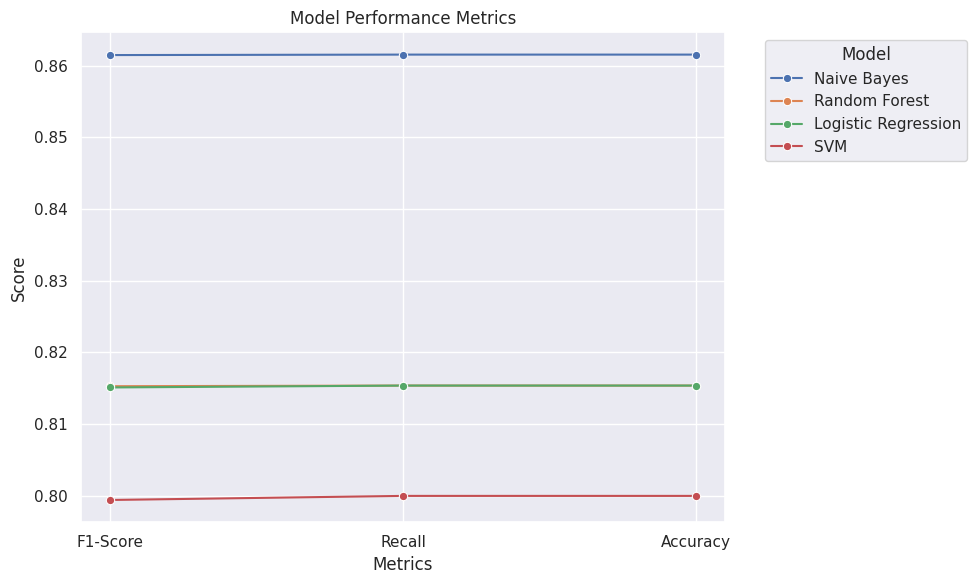

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the metrics have already been calculated as shown in the previous code
# Create a DataFrame with all metrics
model_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes'],
    'F1-Score': [f1_logreg, f1_svm, f1_rf, f1_nb],
    'Recall': [recall_logreg, recall_svm, recall_rf, recall_nb],
    'Accuracy': [accuracy_logreg, accuracy_svm, accuracy_rf, accuracy_nb],
})

# Sort by F1-Score
sorted_model_metrics = model_metrics.sort_values(by='F1-Score', ascending=False)

# Melt the DataFrame for seaborn
melted_metrics = pd.melt(sorted_model_metrics, id_vars=['Model'], var_name='Metrics', value_name='Score')

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

sns.lineplot(data=melted_metrics, x='Metrics', y='Score', hue='Model', marker='o')

plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
